<h1><center>Canceled bookings at a hotel</center></h1>


You have been assigned the task of building a model that will predict whether or not a customer of a hotel will cancel their booking. The data for this assingment is found in the csv file `hotel_clf`

<br> 
<div>
<img src="https://5.imimg.com/data5/PC/BL/MY-33192851/hotel-reservation-services-500x500.jpg" width="400"/>
</div>
<br> 
If the model predicts that a customer will cancel their booking, that customer will be sent a special deal to try to keep the customer from cancel the booking. If the prediction is correct (a True Positive), the expected gain is 1000 SEK. However, if the prediction is wrong (a False Positive), the expected loss is 500 SEK. 

Your goal is to build the most profitable model possible.

<hr style="border:1px solid pink"> </hr>

## Q1 | Choose Metric

Reason about which metric you think will be best to optimize your model for.

- Recall?
- Precision?
- Accuracy?
- F1-score?

Make a decision about which metric you think will lead to the most profitable model

In [59]:
# Answer: Since the business is going to lose money if the customer cancel their booking recall is supposed to be the most important metrics because it would be better to have a false negative rather than missing a real cancellation

## Q2 | Data prepatation

- Prepare your data so that you end up with a clean and preprocessed train and test set
    
    
- Instructions for train test split:    
    - Test size = 0.2
    - Random state = 42

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [61]:
import os
os.getcwd()

'c:\\Data_Science\\IH_Notebooks\\lab-hotel-classifier\\your-code'

In [62]:
data = pd.read_csv('c:/Data_Science/IH_Notebooks/lab-hotel-classifier/data/hotel_clf.csv')
df = data.copy()
df

,hotel,is_canceled,lead_time,adults,children,market_segment,country,reserved_room_type,booking_changes,adr,customer_type
0,City Hotel,1,196,2,0,Online TA,ESP,A,0,105.30,Transient
1,City Hotel,0,44,2,0,Offline TA/TO,FRA,D,0,60.00,Transient
2,City Hotel,1,279,2,0,Groups,PRT,A,0,65.00,Transient
3,City Hotel,0,22,1,0,Corporate,PRT,A,0,62.00,Transient-Party
4,City Hotel,1,299,2,0,Groups,PRT,A,0,62.00,Transient-Party
...,...,...,...,...,...,...,...,...,...,...,...
9995,City Hotel,0,141,3,0,Online TA,NOR,D,0,152.10,Transient-Party
9996,Resort Hotel,0,244,2,0,Online TA,PRT,D,0,89.10,Transient
9997,City Hotel,1,47,2,0,Offline TA/TO,PRT,A,0,75.00,Transient
9998,City Hotel,0,0,2,0,Direct,ESP,A,0,139.00,Transient


In [63]:
target_canc = df.pop('is_canceled')
df['is_canceled'] = target_canc
df

,hotel,lead_time,adults,children,market_segment,country,reserved_room_type,booking_changes,adr,customer_type,is_canceled
0,City Hotel,196,2,0,Online TA,ESP,A,0,105.30,Transient,1
1,City Hotel,44,2,0,Offline TA/TO,FRA,D,0,60.00,Transient,0
2,City Hotel,279,2,0,Groups,PRT,A,0,65.00,Transient,1
3,City Hotel,22,1,0,Corporate,PRT,A,0,62.00,Transient-Party,0
4,City Hotel,299,2,0,Groups,PRT,A,0,62.00,Transient-Party,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,City Hotel,141,3,0,Online TA,NOR,D,0,152.10,Transient-Party,0
9996,Resort Hotel,244,2,0,Online TA,PRT,D,0,89.10,Transient,0
9997,City Hotel,47,2,0,Offline TA/TO,PRT,A,0,75.00,Transient,1
9998,City Hotel,0,2,0,Direct,ESP,A,0,139.00,Transient,0


In [64]:
num = df.select_dtypes(include='number')
cat = df.select_dtypes(exclude='number')
num.columns

Index(['lead_time', 'adults', 'children', 'booking_changes', 'adr',
       'is_canceled'],
      dtype='object')

In [65]:
correlation_matrix = round(num.corr(), 2)
correlation_matrix

,lead_time,adults,children,booking_changes,adr,is_canceled
lead_time,1.00,0.13,-0.04,-0.03,-0.05,0.32
adults,0.13,1.00,0.04,-0.08,0.18,0.06
children,-0.04,0.04,1.00,0.05,0.23,0.00
booking_changes,-0.03,-0.08,0.05,1.00,0.01,-0.14
adr,-0.05,0.18,0.23,0.01,1.00,0.03
is_canceled,0.32,0.06,0.00,-0.14,0.03,1.00


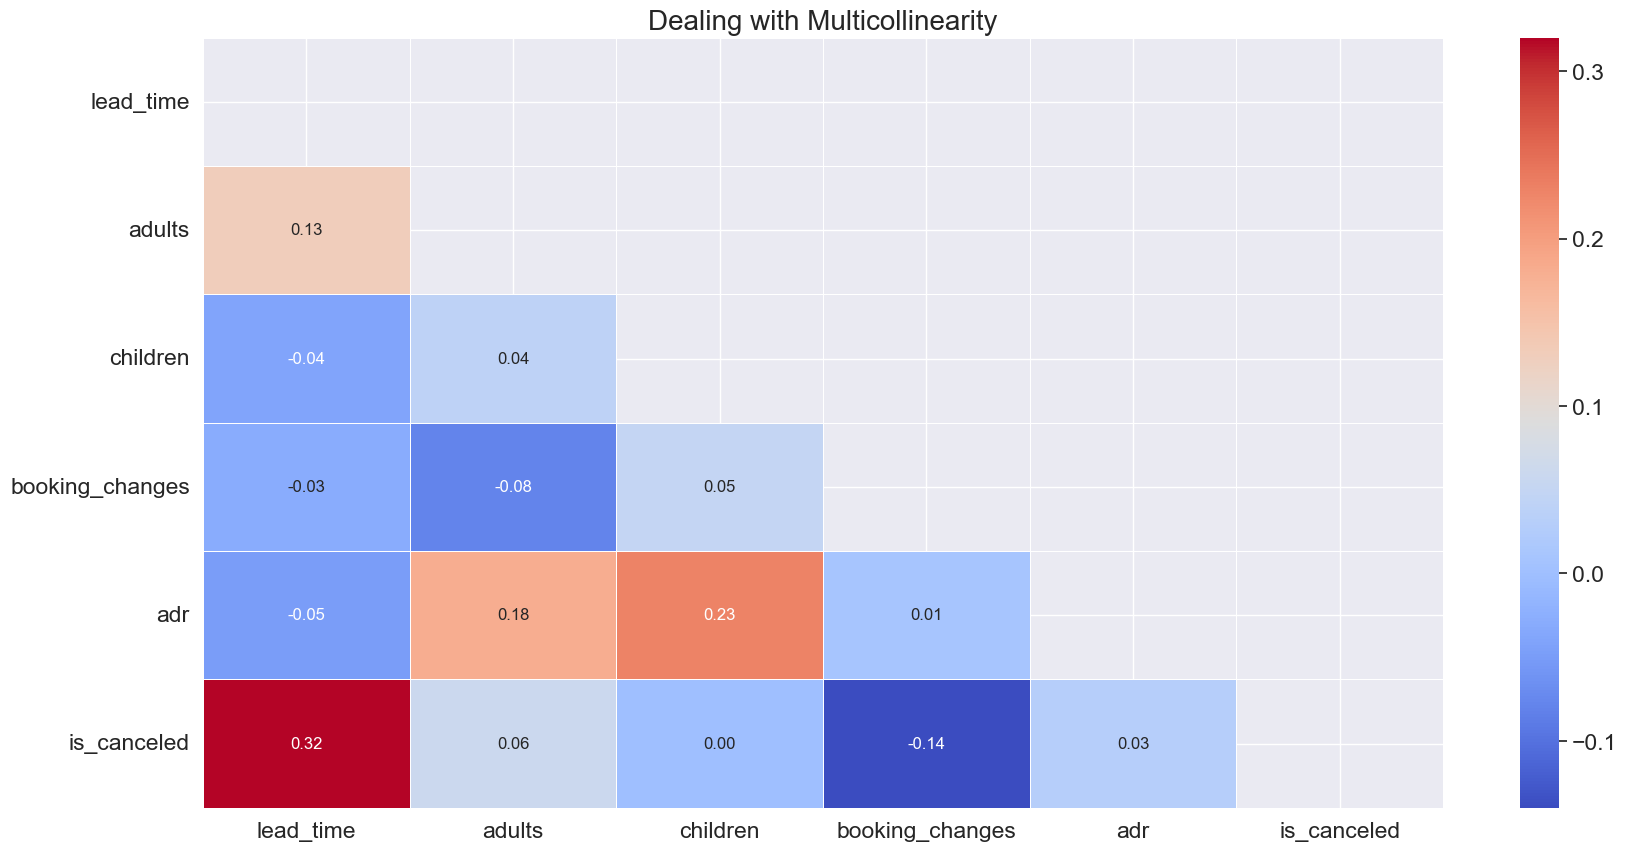

In [66]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [67]:
df = df.drop(columns=['children', 'adr'])

In [68]:
cat.columns

Index(['hotel', 'market_segment', 'country', 'reserved_room_type',
       'customer_type'],
      dtype='object')

In [69]:
from scipy.stats import chi2_contingency
#chi2 correlation test for cat values

chi2_results = []

#for loop to iterate over cat features

for feature in cat:
    contingency_table = pd.crosstab(df[feature], df['is_canceled'])

    _, p, _, _ = chi2_contingency(contingency_table)

    chi2_results.append({
        'Feature' : feature,
        'p-value' : p,
        'Significant (p < 0.05)' : p< 0.05 
    })

chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')

print(chi2_df)

              Feature        p-value  Significant (p < 0.05)
2             country  1.534453e-227                    True
1      market_segment  1.357698e-164                    True
4       customer_type   7.310756e-40                    True
0               hotel   1.880364e-37                    True
3  reserved_room_type   4.877104e-14                    True


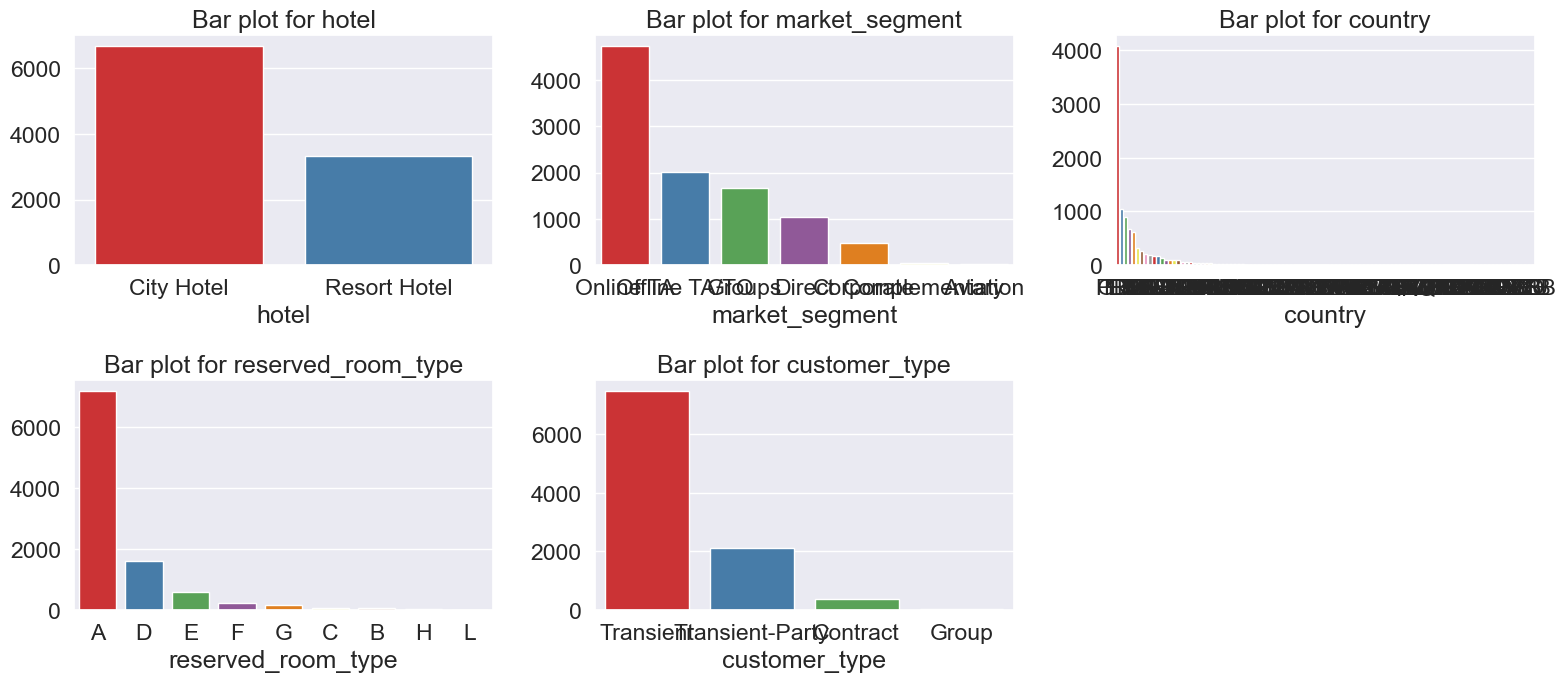

In [70]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(cat, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, palette='Set1')
    plt.title(f'Bar plot for {column}')
    plt.tight_layout()


In [71]:
df.value_counts('is_canceled')

is_canceled
0    6319
1    3681
Name: count, dtype: int64

In [72]:
df.value_counts('country')

country
PRT    4074
GBR    1053
FRA     903
ESP     678
DEU     625
       ... 
LAO       1
LIE       1
MDV       1
MUS       1
ZMB       1
Name: count, Length: 104, dtype: int64

In [73]:
top_countries = ['PRT', 'GBR']

df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,is_canceled
0,City Hotel,196,2,Online TA,Other,A,0,Transient,1
1,City Hotel,44,2,Offline TA/TO,Other,D,0,Transient,0
2,City Hotel,279,2,Groups,PRT,A,0,Transient,1
3,City Hotel,22,1,Corporate,PRT,A,0,Transient-Party,0
4,City Hotel,299,2,Groups,PRT,A,0,Transient-Party,1
...,...,...,...,...,...,...,...,...,...
9995,City Hotel,141,3,Online TA,Other,D,0,Transient-Party,0
9996,Resort Hotel,244,2,Online TA,PRT,D,0,Transient,0
9997,City Hotel,47,2,Offline TA/TO,PRT,A,0,Transient,1
9998,City Hotel,0,2,Direct,Other,A,0,Transient,0


In [74]:
df.value_counts('market_segment')

market_segment
Online TA        4723
Offline TA/TO    2021
Groups           1674
Direct           1032
Corporate         476
Complementary      55
Aviation           19
Name: count, dtype: int64

In [75]:
top_market_segment = ['Online TA', 'Offline TA/TO', 'Groups']

df['market_segment'] = df['market_segment'].apply(lambda x: x if x in top_market_segment else 'Other')

df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,is_canceled
0,City Hotel,196,2,Online TA,Other,A,0,Transient,1
1,City Hotel,44,2,Offline TA/TO,Other,D,0,Transient,0
2,City Hotel,279,2,Groups,PRT,A,0,Transient,1
3,City Hotel,22,1,Other,PRT,A,0,Transient-Party,0
4,City Hotel,299,2,Groups,PRT,A,0,Transient-Party,1
...,...,...,...,...,...,...,...,...,...
9995,City Hotel,141,3,Online TA,Other,D,0,Transient-Party,0
9996,Resort Hotel,244,2,Online TA,PRT,D,0,Transient,0
9997,City Hotel,47,2,Offline TA/TO,PRT,A,0,Transient,1
9998,City Hotel,0,2,Other,Other,A,0,Transient,0


In [76]:
df.value_counts('reserved_room_type')

reserved_room_type
A    7173
D    1623
E     581
F     240
G     171
C      84
B      79
H      48
L       1
Name: count, dtype: int64

In [77]:
top_reserved_rooms = ['A', 'D']

df['reserved_room_type'] = df['reserved_room_type'].apply(lambda x: x if x in top_reserved_rooms else 'Other')

df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,is_canceled
0,City Hotel,196,2,Online TA,Other,A,0,Transient,1
1,City Hotel,44,2,Offline TA/TO,Other,D,0,Transient,0
2,City Hotel,279,2,Groups,PRT,A,0,Transient,1
3,City Hotel,22,1,Other,PRT,A,0,Transient-Party,0
4,City Hotel,299,2,Groups,PRT,A,0,Transient-Party,1
...,...,...,...,...,...,...,...,...,...
9995,City Hotel,141,3,Online TA,Other,D,0,Transient-Party,0
9996,Resort Hotel,244,2,Online TA,PRT,D,0,Transient,0
9997,City Hotel,47,2,Offline TA/TO,PRT,A,0,Transient,1
9998,City Hotel,0,2,Other,Other,A,0,Transient,0


In [78]:
df.value_counts('customer_type')

customer_type
Transient          7460
Transient-Party    2132
Contract            368
Group                40
Name: count, dtype: int64

In [79]:
top_customers = ['Transient', 'Transient-Party']

df['customer_type'] = df['customer_type'].apply(lambda x: x if x in top_customers else 'Other')

df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,is_canceled
0,City Hotel,196,2,Online TA,Other,A,0,Transient,1
1,City Hotel,44,2,Offline TA/TO,Other,D,0,Transient,0
2,City Hotel,279,2,Groups,PRT,A,0,Transient,1
3,City Hotel,22,1,Other,PRT,A,0,Transient-Party,0
4,City Hotel,299,2,Groups,PRT,A,0,Transient-Party,1
...,...,...,...,...,...,...,...,...,...
9995,City Hotel,141,3,Online TA,Other,D,0,Transient-Party,0
9996,Resort Hotel,244,2,Online TA,PRT,D,0,Transient,0
9997,City Hotel,47,2,Offline TA/TO,PRT,A,0,Transient,1
9998,City Hotel,0,2,Other,Other,A,0,Transient,0


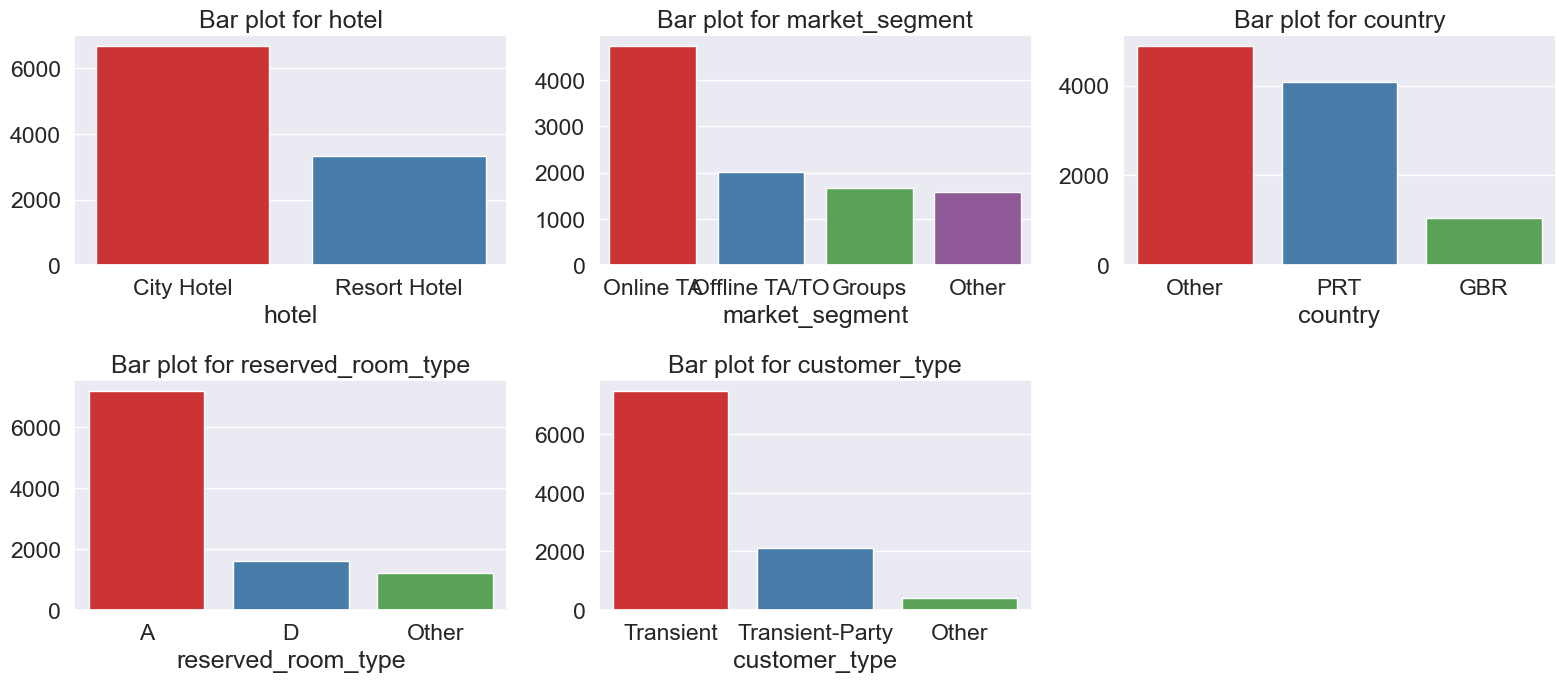

In [80]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(cat, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, palette='Set1')
    plt.title(f'Bar plot for {column}')
    plt.tight_layout()


In [81]:
df.columns

Index(['hotel', 'lead_time', 'adults', 'market_segment', 'country',
       'reserved_room_type', 'booking_changes', 'customer_type',
       'is_canceled'],
      dtype='object')

In [82]:
num.columns

Index(['lead_time', 'adults', 'children', 'booking_changes', 'adr',
       'is_canceled'],
      dtype='object')

In [83]:
#encoding via remapping

replace_dict = {
    "hotel" : {"Resort Hotel": 1, "City Hotel": 0},
    "market_segment" : {"Online TA": 1, "Offline TA/TO": 2, "Groups": 3, "Other": 4},
    "country" : {"PRT": 1, "GBR": 2, "Other": 3},
    "reserved_room_type" : {"A": 1, "D": 2, "Other": 3},
    "customer_type": {"Transient": 1, "Transient-Party": 2, "Other": 3}

}

df.replace(replace_dict, inplace=True)

In [84]:
df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,is_canceled
0,0,196,2,1,3,1,0,1,1
1,0,44,2,2,3,2,0,1,0
2,0,279,2,3,1,1,0,1,1
3,0,22,1,4,1,1,0,2,0
4,0,299,2,3,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...
9995,0,141,3,1,3,2,0,2,0
9996,1,244,2,1,1,2,0,1,0
9997,0,47,2,2,1,1,0,1,1
9998,0,0,2,4,3,1,0,1,0


In [85]:
from sklearn.utils import resample

no_canceled = df[df['is_canceled']==0]
canceled  = df[df['is_canceled']==1]

oversampled_canceled = resample(canceled, replace=True, n_samples=len(no_canceled), random_state=42)  # Reproducible results

display(no_canceled.shape)
display(oversampled_canceled.shape)

(6319, 9)

(6319, 9)

In [86]:
df_oversampled = pd.concat([no_canceled, oversampled_canceled])

df_oversampled

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,is_canceled
1,0,44,2,2,3,2,0,1,0
3,0,22,1,4,1,1,0,2,0
5,0,109,2,1,3,1,1,1,0
10,0,140,1,3,1,1,1,2,0
11,0,297,1,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...
3620,1,90,2,4,1,2,0,1,1
4476,0,143,2,3,1,1,0,1,1
9038,0,75,1,1,3,2,0,1,1
2556,0,306,2,1,3,1,0,2,1


In [87]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='is_canceled')
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Q3 | Build a LogReg Model

Guidelines:
- Use a LogisticRegression model
    - Random state = 42
- Use the metric you decided on in the previous question

- You are not allowed to change the model after looking at the performance on test data
- Your models predictions on test data will be translated into SEK. I.e:
    - 10 TP = 10 * 1 000 SEK = +10 000 
    - 10 FP = 10 * -500 SEK = -5 000 SEK
        - Expected Value from model = +5 000 SEK 
        
        
After you have trained your model, make predictions for your test data and calculate the profitable of the model

In [88]:
log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [89]:
predictions_log_reg = log_reg_model.predict(X_test)

logrec_prediction_df = X_test.copy()

logrec_prediction_df['predicted'] = predictions_log_reg
logrec_prediction_df['actual_y'] = y_test
logrec_prediction_df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,predicted,actual_y
6252,0,518,2,3,2,1,0,2,1,0
4684,0,18,2,1,3,2,0,1,0,0
1731,0,99,2,1,3,1,0,1,0,1
4742,0,70,3,3,3,1,0,2,0,0
4521,0,116,3,1,3,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6412,0,90,2,2,3,1,0,1,0,0
8285,1,216,2,1,2,3,0,1,1,0
7853,0,16,1,2,1,1,0,1,1,1
1095,0,40,2,1,1,1,0,3,0,1


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_log_reg))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1240
           1       0.76      0.54      0.63       760

    accuracy                           0.76      2000
   macro avg       0.76      0.72      0.73      2000
weighted avg       0.76      0.76      0.75      2000



In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tn, fp, fn, tp = confusion_matrix(y_test, forest_predictions).ravel()

profit_from_tps = tp * 1000
loss_from_fps = fp * -500
net_profit = profit_from_tps + loss_from_fps

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"Profit from TPs: {profit_from_tps} SEK")
print(f"Loss from FPs: {loss_from_fps} SEK")
print(f"Net Profit: {net_profit} SEK")

True Positives (TP): 492
False Positives (FP): 215
Profit from TPs: 492000 SEK
Loss from FPs: -107500 SEK
Net Profit: 384500 SEK


## Conclusion LogReg:

The LogReg model is not performing well on the Recall metrics.
While our model is good at defining who is going to cancel the reservation, it makes 46% of errors when it comes to booking which weren't canceled.

## Q4 | Build a RandomForestClassifier model

- Use a RandomForestClassifier model:
    - random_state = 42


- After you have trained your model, make predictions for your test data and calculate the profitable of the model

- Which model was more profitable, the LogReg or the RandomForestClassifier?

In [92]:
forest_model = RandomForestClassifier(random_state=42)

forest_model.fit(X_train, y_train)

forest_predictions = forest_model.predict(X_test)

forest_prediction_df = X_test.copy()

forest_prediction_df['predicted'] = forest_predictions

forest_prediction_df['actual_y'] = y_test

forest_prediction_df

,hotel,lead_time,adults,market_segment,country,reserved_room_type,booking_changes,customer_type,predicted,actual_y
6252,0,518,2,3,2,1,0,2,0,0
4684,0,18,2,1,3,2,0,1,0,0
1731,0,99,2,1,3,1,0,1,0,1
4742,0,70,3,3,3,1,0,2,0,0
4521,0,116,3,1,3,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6412,0,90,2,2,3,1,0,1,0,0
8285,1,216,2,1,2,3,0,1,1,0
7853,0,16,1,2,1,1,0,1,0,1
1095,0,40,2,1,1,1,0,3,1,1


In [93]:
print(classification_report(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1240
           1       0.70      0.65      0.67       760

    accuracy                           0.76      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.76      0.76      0.76      2000



In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tn, fp, fn, tp = confusion_matrix(y_test, forest_predictions).ravel()

profit_from_tps = tp * 1000
loss_from_fps = fp * -500
net_profit = profit_from_tps + loss_from_fps

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"Profit from TPs: {profit_from_tps} SEK")
print(f"Loss from FPs: {loss_from_fps} SEK")
print(f"Net Profit: {net_profit} SEK")

True Positives (TP): 492
False Positives (FP): 215
Profit from TPs: 492000 SEK
Loss from FPs: -107500 SEK
Net Profit: 384500 SEK


## Q5 | Did you choose the right metric? 

Calculate the profitablity for the RandomForestClassifier for all 4 different metrics. Then rank order the outcome. I.e.:

- RFC (precision) = 1
- RFC (accuracy) = 2
- ...
- ...


***Note:*** You don't have to use a param_grid for this question, just run the RandomForest with default settings

In [95]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

recall = recall_score(y_test, forest_predictions, average='binary')
precision = precision_score(y_test, forest_predictions, average='binary')
accuracy = accuracy_score(y_test, forest_predictions)
f1 = f1_score(y_test, forest_predictions, average='binary')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Recall: 0.6474
Precision: 0.6959
Accuracy: 0.7585
F1-Score: 0.6708
